# Sieci neuronowe 1 - LAB

    prowadzący: Monika Wasilewska
    Politechnika Wrocławska, Katedra Akustyki, Multimediów i Przetwarzania Sygnałów
    

Run a cell via `Shift + Return`. Learn more about [CoCalc Jupyter Notebooks](https://doc.cocalc.com/jupyter.html).

---
Plan zajęć:
---
1. Warstwy w sieciach neuronowych.
2. Budowa modelu
3. Podział danych na treningowe i testowe.
3. Ocena modelu
---

In [1]:
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
def normalize_data(data):
    # data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    data = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))
    return data

# Zadanie 1
Wczytaj bazę danych `CIFAR10`. Sprawdź wartości z których składają się obrazki, jeśli to konieczne dokonaj normalizacji.  

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Zadanie 2
Zakoduj etykiety jako `one-hot` korzystając z metody poznanej wcześniej na zajęciach, a zdefiniowanej w tensorflow.

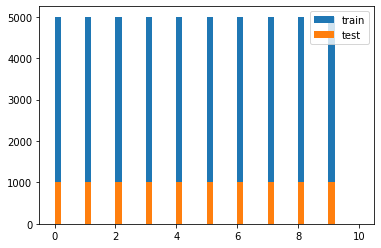

In [4]:
# Create labels and convert to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Draw histogram of labels
plt.hist(train_labels, bins=10, width=0.2, range=(0,10), align='mid')
plt.hist(test_labels, bins=10, width=0.2, range=(0,10), align='mid')
plt.legend(['train', 'test'])
plt.show()

# Normalize pixel values to be between 0 and 1
train_images_norm, test_images_norm = normalize_data(train_images), normalize_data(test_images)

# Zadanie 3
Stwórzmy model sieci za pomocą zaimportowanego wcześniej `tensorflow.keras.models.Sequential`. Model, który będzie przez nas wykorzystywany będzie modelem konwolucyjnym i został zdefiniowany poniżej. 

1. Wyświetl informacje o modelu.

2. Korzystając z wyświetlonego opisu oraz dokumentacji wypisz parametry modelu takie jak wielkość jądra w każdej z warstw, wykorzystane funkcje aktywacji oraz wielkości wyjścia po każdej z warstw. Wyjaśnij do czego służy `Flatten` czy jest warstwą uczącą się oraz dlaczego ostatnia warstwa ma 10 neuronów.

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(20, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(30, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(40, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

2023-02-04 15:31:12.059162: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# tutaj wyswietl informacje o modelu (3.1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 20)        560       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 30)        5430      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 30)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 40)          10840     
                                                                 
 flatten (Flatten)           (None, 640)               0

Wypisz parametry modelu takie jak wielkość jądra w każdej z warstw, wykorzystane funkcje aktywacji oraz wielkości wyjścia po każdej z warstw.

* Pierwsza warstwa konwolucyjna ma jądro o wielkości 3x3, wykorzystuje funkcję aktywacji ReLU oraz wyjście ma wielkość 30x30x20.
* Druga warstwa konwolucyjna ma jądro o wielkości 3x3, wykorzystuje funkcję aktywacji ReLU oraz wyjście ma wielkość 13x13x30.
* Trzecia warstwa konwolucyjna ma jądro o wielkości 3x3, wykorzystuje funkcję aktywacji ReLU oraz wyjście ma wielkość 4x4x40.
* Warstwa Flatten przekształca dane z dwuwymiarowej macierzy do jednowymiarowej tablicy.
* Warstwa Dense ma 64 neurony i wykorzystuje funkcję aktywacji ReLU.
* Warstwa Dense ma 10 neuronów i wykorzystuje funkcję aktywacji softmax.

Do czego służy MaxPooling2D? MaxPooling2D jest warstwą redukującą wymiarowość danych poprzez wybieranie maksymalnej wartości z określonego obszaru.

Czy warstwa Flatten jest warstwą uczącą się? Nie, jest to warstwa przekształcająca dane z dwuwymiarowej macierzy do jednowymiarowej tablicy.

Dlaczego ostatnia warstwa ma 10 neuronów? Ponieważ jest to problem klasyfikacji 10 klas.


# Zadanie 4
Nauczmy (choć odrobinę) nasz model! Wykorzystaj do tego funkcję `fit`, a jej wyjście zapisz do zmiennej `history`. Aby nie czekać zbyt długo użyjmy 5 epok. Jaki rozmiar `minibatacha` wybierzesz? Korzystając z dokumentacji jak i wiedzy zdobytej na wykładzie wybierz jego rozmiar i uzasadnij wybór.

In [7]:
# Train model (batch size must be greater than number of classes)
history = model.fit(train_images_norm, train_labels_one_hot, epochs=5, batch_size=32, validation_data=(test_images_norm, test_labels_one_hot))

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5531 - accuracy: 0.4333 - val_loss: 1.2831 - val_accuracy: 0.5359
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2060 - accuracy: 0.5719 - val_loss: 1.1248 - val_accuracy: 0.6021
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0658 - accuracy: 0.6242 - val_loss: 1.0446 - val_accuracy: 0.6331
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9785 - accuracy: 0.6581 - val_loss: 0.9685 - val_accuracy: 0.6598
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9097 - accuracy: 0.6783 - val_loss: 0.9408 - val_accuracy: 0.6709


**Uzupełnij**: `minibatch` w moim programie ma rozmiar 32, ponieważ musi on być większy od liczby klas (=10) i powinien być całkowitą potęgą 2.

# Zadanie 5

Wykorzystajmy kroswalidację. Podzielmy zbiór danych na 10 podzbiorów - w każdej z epok będziemy wykorzystywać 8 podzbiorów do uczenia, a 2 do testowania. 

Wskazówka: O co musisz zadbać w każdym z podzbiorów? Czy możemy podzielić dowolnie zbiór? Jaki rozkład klas powinien być w każdym podzbiorze? 

Odp. W każdym podzbiorze powinien być równomierny rozkład klas.

---

In [8]:
# Append test images to train images
images = np.append(train_images_norm, test_images_norm, axis=0)
labels = np.append(train_labels, test_labels, axis=0)

In [9]:
k = 10 # number of subsets
n = images.shape[0] # number of images
subset_size = n // k # size of each subset

# Create subsets
subsets = np.split(images, k)
label_subsets = np.split(labels, k)

# Zadanie 6

Nauczmy model wykorzystując sprawdzian krzyżowy (kroswalidację). Wykorzystajmy metodę `fit` w pętli `for`. W każdeym przebiegu pętli liczbę epok ustawiamy na `1` i przekazujemy inne kombinacje zbiorów danych.

In [10]:
# Perform cross validation test for different combinations of subsets.
# For each combination, train model on all subsets except two of them and test on the remaining subset.

# Create empty lists for storing results
train_acc = []
test_acc = []
train_loss = []
test_loss = []

# Iterate over all combinations of subsets
for i in range(k):
    for j in range(i+1, k):
        # Get indices of subsets to be used for testing
        test_idx = np.append(i, j)
        # Get indices of subsets to be used for training
        train_idx = np.delete(np.arange(k), test_idx)
        
        # Get training and testing data
        # Concatenate subsets to be used for training
        for idx in train_idx:
            if idx == train_idx[0]:
                train_data = subsets[idx]
                train_labels = label_subsets[idx]
            else:
                train_data = np.append(train_data, subsets[idx], axis=0)
                train_labels = np.append(train_labels, label_subsets[idx], axis=0)
        
        # Concatenate subsets to be used for testing
        for idx in test_idx:
            if idx == test_idx[0]:
                test_data = subsets[idx]
                test_labels = label_subsets[idx]
            else:
                test_data = np.append(test_data, subsets[idx], axis=0)
                test_labels = np.append(test_labels, label_subsets[idx], axis=0)

        # Convert labels to one-hot encoding
        train_labels_one_hot = to_categorical(train_labels)
        test_labels_one_hot = to_categorical(test_labels)
        # Train model
        history = model.fit(train_data, train_labels_one_hot, epochs=1, batch_size=32, validation_data=(test_data, test_labels_one_hot))
        # Store results
        train_acc.append(history.history['accuracy'])
        test_acc.append(history.history['val_accuracy'])
        train_loss.append(history.history['loss'])
        test_loss.append(history.history['val_loss'])

1500/1500 [==============================] - 7s 5ms/step - loss: 0.3380 - accuracy: 0.8795 - val_loss: 0.4414 - val_accuracy: 0.8442


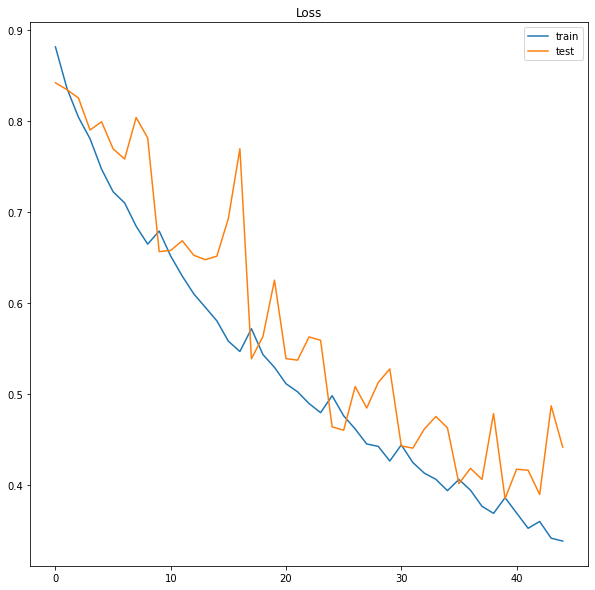

In [11]:
# Plot results
plt.figure(figsize=(10, 10))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.legend()
plt.title('Accuracy')
plt.show()

plt.figure(figsize=(10, 10))
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.legend()
plt.title('Loss')
plt.show()

# Zadanie 7
Wykorzystaj swoją sieć do obliczenia klas w zbiorze testowym wczytanym oryginalnie z CIFAR10. Wykorzystaj metodę `predict` dla swojego modelu, a następnie `argmax` z pakietu numpy, aby zwrócić numer klasy do której przyporządkowany został testowany przykład.

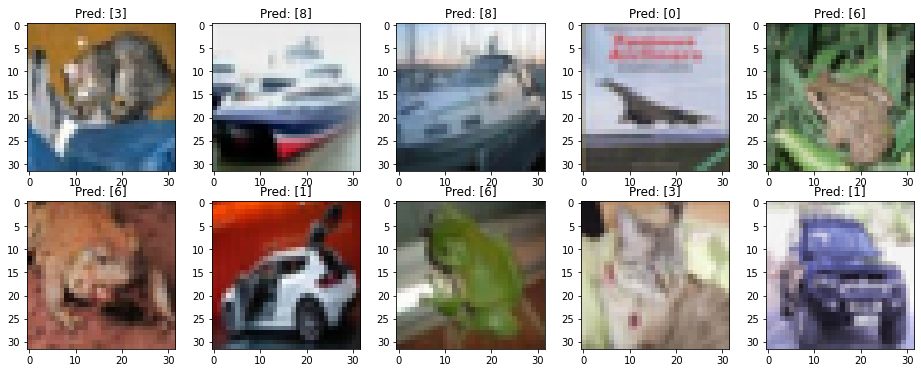

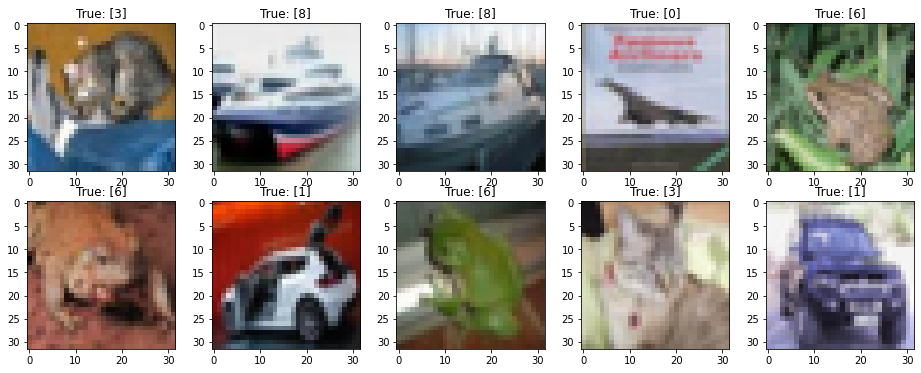

In [18]:
# Predict and argmax
predictions = model.predict(test_images_norm)
predictions = np.argmax(predictions, axis=1)

# Plot some images with their predicted labels
plt.figure(figsize=(16,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.title('Pred: [' + str(predictions[i])+ ']')
plt.show()

# Plot some images with their true labels
plt.figure(figsize=(16,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.title('True: ' + str(test_labels[i]))

plt.show()

# Zadanie 8
Wykorzytując wiedzę zdobytą na Uczeniu Maszynowym wyrysuj *macierz pomyłek* częściej nazywaną *macierzą konfuzji*. Wyświetl ją dla danych wykorzystanych do treningu oraz do danych testowych.

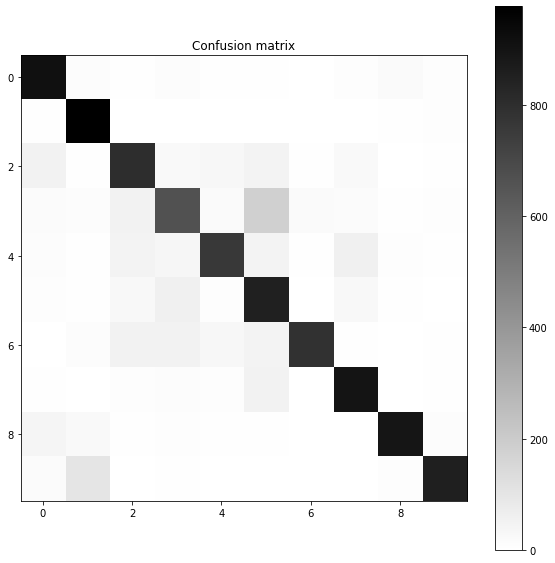

In [13]:
from sklearn.metrics import confusion_matrix

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
plt.figure(figsize=(10,10))
# Plot confusion matrix for test data
cm = confusion_matrix(test_labels, predictions)
plt.imshow(cm, cmap='binary')
plt.colorbar()
plt.title('Confusion matrix')
plt.show()

# Zadanie 9 - w ramach ćwiczeń domowych

Przetrenuj swój model wykorzystując:
 1. Większą liczbę epok oraz dodatkowe przetwarzanie obrazka (np. obrót, przybliżenie) (50)
 2. obrazek podany w skali szarości

In [25]:
# Use transformer from tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images_norm, test_images_norm = normalize_data(train_images), normalize_data(test_images)

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen.fit(train_images_norm)

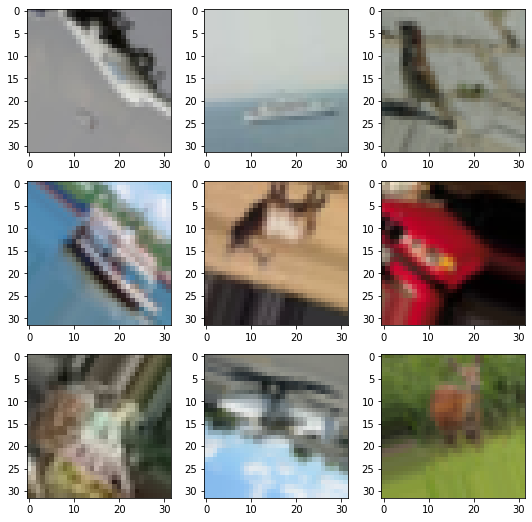

In [26]:
# Plot some rotated images
plt.figure(figsize=(9,9))
for X_batch, y_batch in datagen.flow(train_images_norm, train_labels_one_hot, batch_size=9):
    for i in range(0, 9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_batch[i])
    plt.show()
    break

In [27]:
# Train model
history = model.fit(datagen.flow(train_images_norm, train_labels_one_hot, batch_size=32), epochs=5, validation_data=(test_images_norm, test_labels_one_hot))

Epoch 1/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4329 - accuracy: 0.4794 - val_loss: 1.2683 - val_accuracy: 0.5497
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4112 - accuracy: 0.4896 - val_loss: 1.2068 - val_accuracy: 0.5774
Epoch 3/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3974 - accuracy: 0.4971 - val_loss: 1.1942 - val_accuracy: 0.5764
Epoch 4/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3791 - accuracy: 0.5029 - val_loss: 1.1504 - val_accuracy: 0.5982
Epoch 5/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3743 - accuracy: 0.5037 - val_loss: 1.1432 - val_accuracy: 0.5866


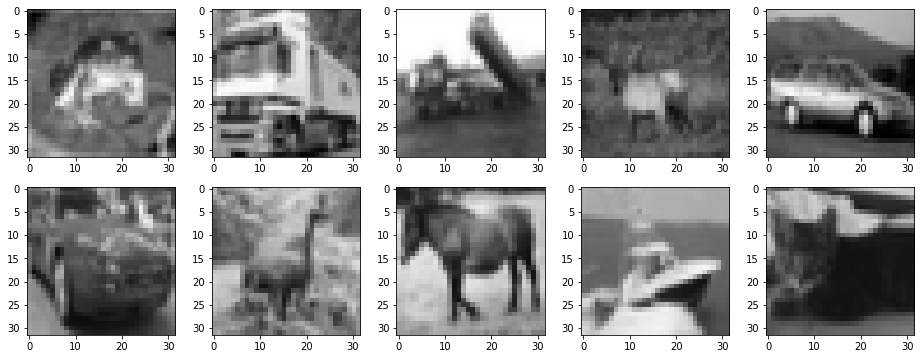

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9843 - accuracy: 0.6548 - val_loss: 0.9061 - val_accuracy: 0.6899
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8234 - accuracy: 0.7113 - val_loss: 0.8567 - val_accuracy: 0.7014
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7601 - accuracy: 0.7347 - val_loss: 0.8858 - val_accuracy: 0.6965
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7110 - accuracy: 0.7529 - val_loss: 0.8589 - val_accuracy: 0.7119
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6688 - accuracy: 0.7662 - val_loss: 0.8729 - val_accuracy: 0.7072


In [28]:
# Gray scale images
def convert2gray(img):
   x=np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
   mychannel=np.repeat(x[:, :, np.newaxis], 3, axis=2)
   return mychannel

def convert_to_gray(images):
    gray_images = []
    for image in images:
        gray_images.append(convert2gray(image))
    return np.array(gray_images)

train_gray_images = convert_to_gray(train_images_norm)
test_gray_images = convert_to_gray(test_images_norm)

# Plot some gray scale images
plt.figure(figsize=(16,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_gray_images[i], cmap='gray')

plt.show()

history = model.fit(train_gray_images, train_labels_one_hot, epochs=5, batch_size=32, validation_data=(test_gray_images, test_labels_one_hot))

---